In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cuda')

In [3]:
#from transformers import BertTokenizer, BertModel, AutoModelForSequenceClassification, AdamW, get_scheduler
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')                                                     
#model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=314)

In [4]:
from transformers import AutoTokenizer, AutoModel, AutoModelForSequenceClassification, AdamW, get_scheduler
model_name = "sberbank-ai/sbert_large_nlu_ru"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=314)
#попробуем позже

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sberbank-ai/sbert_large_nlu_ru and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
#load best model
#model.load_state_dict(torch.load("../../best_model3004/pytorch_model.bin", map_location=device))

<All keys matched successfully>

In [5]:
torch.cuda.empty_cache()
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024

In [6]:
df = pd.read_csv("../../draft.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df['id'] = pd.Series(df['id']).astype(str)

In [7]:
g_id = []
for id in df['id']:
    if len(id) == 10:
        g_id.append(str(id)[:4])
    else:
        g_id.append('0' + str(id)[:3])
df['g_id'] = g_id

In [10]:
df.value_counts('g_id')

g_id
4011    9837
9503    8636
8708    6086
7318    2991
3926    2246
        ... 
6103       3
7225       3
8101       3
5311       3
6107       3
Length: 484, dtype: int64

In [9]:
min_req = 2
filtered_classes = df.g_id.value_counts()[df.g_id.value_counts() > min_req].index.values

df = df[df.g_id.apply(lambda x: True if x in filtered_classes else False)]
df

,id,label,g_id
1,604909900,растения засушенные обработанные антисептиком...,0604
2,711400000,огурцы корнишоны консервированные для кратко...,0711
4,803901000,бананы свежие зеленые сорта cavendish,0803
5,804500009,сушеные тропические фрукты употребляемые в пи...,0804
6,805102000,плоды цитрусовых культур апельсины свежие,0805
...,...,...,...
87483,1704907500,сливочные конфеты не содержащие какао тм sto...,1704
87484,1704907500,пищевой наполнитель для пром произв ва пищевой...,1704
87485,1704907500,тоффи карамели и аналогичные сладости не содер...,1704
87486,1704907500,кондитерские изделия из сахара не содержащие к...,1704


In [11]:
counts = df.value_counts('id')
df_count = pd.DataFrame(data={'id': counts.index, 'count': counts.values})

In [58]:
df_count.to_csv('../../tnveds_sort.csv')

In [74]:
df

,description,labels
0,фитинги для труб или трубок из коррозинностойк...,138
1,инструмент для демонтажа декоративной крышки к...,43
2,бумага из целлюлозных волокон для использовани...,63
3,6600005819 регулятор высоты ремня безопасности...,177
4,упаковка стеклянная для парфюмерно косметическ...,129
...,...,...
86037,игрушки детские имеющие встроенный двигатель ...,295
86038,8891428999 rear bumper body upr верхний элемен...,259
86039,светильники электрические поставляются частич...,294
86040,6666056178 compl a side structure lh левая бок...,259


In [12]:
df = df[df['label'].notnull()]

In [13]:
df['label'] = df['label'].apply(lambda x: ' '.join(x.split()[:400]) if len(x.split())>400 else x)

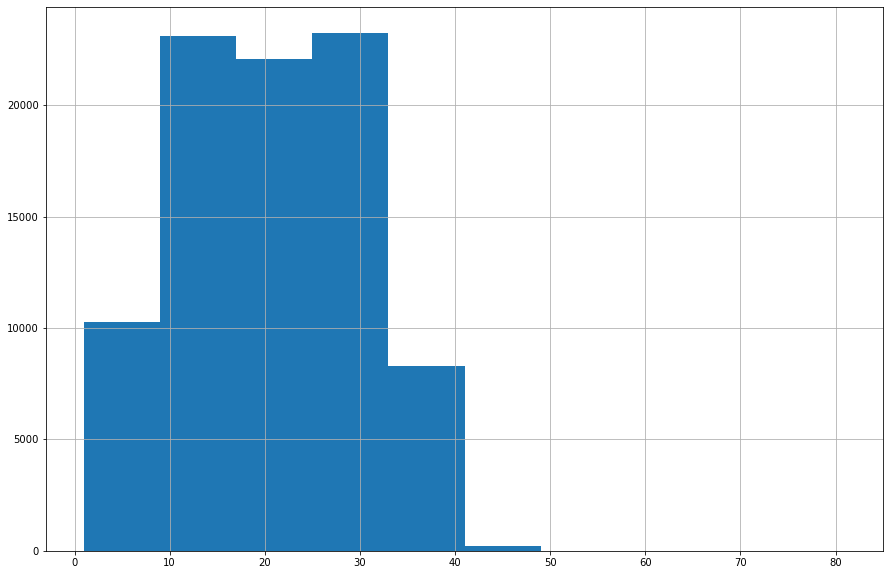

In [14]:
a = df['label'].apply(lambda x: len(x.split())).hist(figsize=(15, 10))

In [15]:
df['label'][df['label'].apply(lambda x: True if len(x.split()) == 1 else False)]

3238                свечи
9755             патрубок
10006               хомут
15540              стулья
16717    видеорегистратор
               ...       
86179                воск
86517             тoвары 
86655        аhтибиотики 
86931         дипиридaмол
87003         эторикоксиб
Name: label, Length: 94, dtype: object

In [16]:
from sklearn import preprocessing
Label_encoder = preprocessing.LabelEncoder()
Label_encoder.fit(df['g_id'])

LabelEncoder()

In [17]:
df['g_id'] = Label_encoder.fit_transform(df['g_id'])

In [18]:
df.drop('id', axis=1, inplace=True)

In [19]:
df.columns = ['description', 'labels']

In [20]:
df.to_csv('../../label_enc600.csv', index=False)

In [21]:
np.save('./classes600.npy', Label_encoder.classes_)

In [25]:
df = df.sample(frac=1).reset_index(drop=True)
train = df[:int(len(df)*0.8)]
test =  df[int(len(df)*0.8):]

In [26]:
print(len(test['labels'].value_counts()))

429


In [27]:
train.to_csv('../../train600.csv', index=False)
test.to_csv('../../test600.csv', index=False)

In [28]:
model.named_parameters

<bound method Module.named_parameters of BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [29]:
torch.cuda.empty_cache()
import gc
gc.collect()

0

In [5]:
#!pip install datasets

In [30]:
from datasets import load_dataset, load_metric
dataset = load_dataset('csv', data_files={'train': '../../train600.csv', 'test': '../../test600.csv'})

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset csv downloaded and prepared to /home/sincosxy/.cache/huggingface/datasets/csv/default-9ab481b12baee94f/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [31]:
dataset = dataset.map(lambda e: tokenizer(e['description'], truncation = True, max_length=100, padding='max_length'), batched=True)

Map:   0%|          | 0/69804 [00:00<?, ? examples/s]

Map:   0%|          | 0/17451 [00:00<?, ? examples/s]

In [32]:
pytorch_style_columns = ['input_ids', 'token_type_ids', 'attention_mask', 'labels']  # 
dataset = dataset.remove_columns(set(dataset['train'].features.keys()) - set(pytorch_style_columns))

In [33]:
set(dataset['train'].features.keys())


{'attention_mask', 'input_ids', 'labels', 'token_type_ids'}

In [34]:
dataset.set_format(type='torch', columns=pytorch_style_columns, device='cuda') 

In [35]:
dataset.shape

{'train': (69804, 4), 'test': (17451, 4)}

In [36]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset['train'], shuffle=True, batch_size=8)
test_dataloader = DataLoader(dataset['test'], shuffle=False, batch_size=8)
#если есть видеопамять около 10гб, можно поставить 8

In [30]:
len(train_dataloader)

8726

In [37]:

optimizer = AdamW(model.parameters(), lr=2e-6)

num_epochs = 15

num_training_steps = num_epochs * len(train_dataloader)


lr_scheduler = get_scheduler(
    "constant_with_warmup",
    optimizer=optimizer,
    num_warmup_steps=2000,
    num_training_steps=num_training_steps
)

/home/sincosxy/.local/lib/python3.10/site-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [38]:
torch.cuda.empty_cache()
import gc
gc.collect()

69

In [40]:
from tqdm import tqdm

In [41]:
#next(iter(train_dataloader))
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(120138, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1024

In [43]:
num_epochs = 15

In [ ]:
best_f1 = 0.
show_train_loss_every_num_epoch = 0.1

for epoch in range(num_epochs):
    print(40*'-', '\nepoch', epoch+1)
    model.train()
    losses = []

    for i, batch in enumerate(tqdm(train_dataloader)):
        model.train()
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        losses.append(loss.item())

        #f i%int(len(train_dataloader)*show_train_loss_every_num_epoch)==int(len(train_dataloader)*show_train_loss_every_num_epoch)-1:
    print(f'train loss [{i*100/len(train_dataloader):.2f}%]: {np.array(losses).mean():.3f}')
    losses = []
    print('\nvalidating')

    f1 = load_metric('f1')
    acc = load_metric('accuracy')
    precision = load_metric('precision')
    recall = load_metric('recall')
    with torch.no_grad():
        model.eval()
                
        for batch in tqdm(test_dataloader):
        ##for batch in test_dataloader:
            batch = {k: v.to(device) for k, v in batch.items()}
            with torch.no_grad():
                outputs = model(**batch)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=-1)
            f1.add_batch(predictions=predictions, references=batch["labels"])    
            acc.add_batch(predictions=predictions, references=batch["labels"])    
            precision.add_batch(predictions=predictions, references=batch["labels"])    
            recall.add_batch(predictions=predictions, references=batch["labels"])    

        print('weighted summary:')
        print('Test acc:', acc.compute()['accuracy'])
        print('Test precision:', precision.compute(average = 'weighted')['precision'])
        print('Test recall:', recall.compute(average = 'weighted')['recall'])
        f1_weighted = f1.compute(average = 'weighted')['f1']
        print('Test f1:', f1_weighted, '\n')

        if f1_weighted > best_f1:
            best_f1 = f1_weighted
            model.save_pretrained("../../best_model600")

    model.train()

---------------------------------------- 
epoch 1


  0%|                                                                                       | 0/8726 [00:00<?, ?it/s]/pytorch/aten/src/ATen/native/hip/Loss.hip:242: nll_loss_forward_reduce_cuda_kernel_2d: Device-side assertion `t >= 0 && t < n_classes' failed.
/pytorch/aten/src/ATen/native/hip/Loss.hip:242: nll_loss_forward_reduce_cuda_kernel_2d: Device-side assertion `t >= 0 && t < n_classes' failed.


In [16]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
Label_encoder = preprocessing.LabelEncoder()
Label_encoder.classes_ = np.load('./classes.npy', allow_pickle=True)

true = []
preds = []

model.eval()
for batch in tqdm(test_dataloader):
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    true += batch["labels"].detach().cpu().numpy().tolist()
    preds += predictions.detach().cpu().numpy().tolist()

print(classification_report(Label_encoder.inverse_transform(true), Label_encoder.inverse_transform(preds)))

100%|████████████████████████████████████████████████████████████████████████████| 2152/2152 [02:45<00:00, 13.01it/s]
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        0805       0.00      0.00      0.00         9
        0808       1.00      0.38      0.55        16
        1704       0.38      1.00      0.56        80
        1905       0.00      0.00      0.00        14
        2003       0.88      1.00      0.94        15
        2007       0.00      0.00      0.00         7
        2009       0.00      0.00      0.00         8
        2105       0.00      0.00      0.00         8
        2106       1.00      0.17      0.29        30
        2202       0.00      0.00      0.00         3
        2710       0.00      0.00      0.00         8
        2918       0.00      0.00      0.00        29
        2924       0.00      0.00      0.00        27
        2933       0.19      0.76      0.31        55
        2934       0.00      0.00      0.00        36
        2941       0.00      0.00      0.00        22
        3005       1.00      1.00      1.00        14
        3206       1.00    

/home/sincosxy/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
inputs = tokenizer('покрышки', truncation = True, max_length=100, padding='max_length', return_tensors="pt")
#batch = {k: torch.tensor(v).to(device) for k, v in txt.items()}
model.to(torch.device('cpu'))
with torch.no_grad():
    logits = model(**inputs).logits
predicted_class_id = logits.argmax().item()
#Label_encoder.inverse_transform(predicted_class_id)
a = []
a.append(predicted_class_id)

In [114]:
Label_encoder.inverse_transform([a])

array(['4011'], dtype=object)

In [17]:
def predict_class(text):
    model.to(torch.device('cpu'))
    inputs = tokenizer(text, truncation = True, max_length=100, padding='max_length', return_tensors="pt")
    with torch.no_grad():
        logits = model(**inputs).logits
        predicted_class_id = logits.argmax().item()
        return Label_encoder.inverse_transform([predicted_class_id])


In [19]:
print(predict_class("Велосипед"), predict_class("велосипед"), predict_class("Велосипедов"))

['9503'] ['9503'] ['8714']
